In [36]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import scipy as sp

In [37]:
fname = r'results\2024-05-16 09.51 - S3A - a=0.83435 b=0.947_raw.csv'
with open(fname, 'r') as f:
    df = pd.read_table(f, sep=',', header=0, index_col=0)

df

,Time,Lat,Lon,Unscaled,IMIC,RADS GIM
0,2016-05-05 22:10:00,45.016006,348.742964,-0.004938,-0.010764,-0.0019
1,2016-05-05 22:47:00,0.235118,168.066800,-0.002816,-0.017441,0.0015
2,2016-05-05 23:43:00,16.541606,331.636868,-0.001858,-0.009380,-0.0047
3,2016-05-06 00:38:00,-35.147338,134.179343,-0.006873,-0.012524,-0.0033
4,2016-05-06 01:29:00,35.301502,301.494969,-0.005543,-0.011536,-0.0021
...,...,...,...,...,...,...
5574,2017-03-01 18:19:00,-44.509884,226.473885,-0.007307,-0.012909,0.0007
5575,2017-03-01 19:53:00,-17.797289,208.876416,0.003735,-0.009893,0.0027
5576,2017-03-01 21:32:00,-10.179034,185.391178,0.000421,-0.012931,0.0003
5577,2017-03-01 22:30:00,39.366726,345.127225,-0.001557,-0.004861,0.0014


In [39]:
# aqui
# cols = ['Time', 'Lat', 'Lon', 'Unscaled', 'IMIC', 'RADS GIM']

time_raw = df['Time']
diff_unscaled = df['Unscaled']
diff_IMIC = df['IMIC']
diff_RADS = df['RADS GIM']
lon = df['Lon']
lat = df['Lat']
# cast time series to datetime object
time = pd.to_datetime(time_raw)


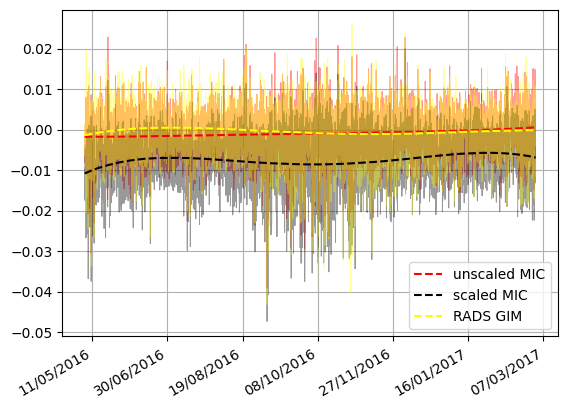

In [65]:
order = 4
diff_unscaled_filter = sp.signal.savgol_filter(diff_unscaled, len(diff_unscaled), order)
diff_IMIC_filter = sp.signal.savgol_filter(diff_IMIC, len(diff_IMIC), order)
diff_RADS_filter = sp.signal.savgol_filter(diff_RADS, len(diff_RADS), order)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.gcf().autofmt_xdate()

plt.plot(time, diff_unscaled,        color='red', alpha=0.4, lw=0.7)
plt.plot(time, diff_IMIC,            color='black', alpha=0.4, lw=0.7)
plt.plot(time, diff_RADS,            color='yellow', alpha=0.4, lw=0.7)
plt.plot(time, diff_unscaled_filter, color='red', ls='--', label=r'unscaled MIC')
plt.plot(time, diff_IMIC_filter,     color='black', ls='--', label='scaled MIC')
plt.plot(time, diff_RADS_filter,     color='yellow', ls='--', label='RADS GIM')
plt.plot()
plt.grid()
plt.legend()
plt.show()